## 9. 임베딩 내 편향성 알아보기 - Project

### WEAT 구현하기

In [199]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

In [207]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b

In [200]:
def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

### 직접 만드는 Word Embedding에 WEAT 적용

#### 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [3]:
import os

with open('./weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end='')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
 젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
 어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
 자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
 자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
 너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
 그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
 이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
 "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
 영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
 은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
 민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해야만 하는 자, 따라서

In [4]:
# My code better
#약 15분정도 걸립니다.

from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open('./weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True) #norm : Normalize
        res = []
        for w in words:
            if "Noun" in w:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
                
        tokenized.append(res)

In [5]:
tokenized[:10]

[['사운드', '엔지니어', '상우', '유지태', '분', '치매', '할머니', '백성희', '분'],
 ['시절', '상처', '아버지', '박인환', '분', '고모', '신신애', '분', '살'],
 ['겨울', '그', '지방', '방송국', '라디오', '은수', '이영애', '분', '를'],
 ['자연', '소리', '채집', '라디오', '프로그램', '준비', '은수', '상우', '녹음', '여행'],
 ['두', '사람', '날', '은수', '아파트', '밤'],
 ['사랑', '두', '사람', '상우', '주체', '수', '정도', '그녀'],
 ['겨울', '만난', '두', '사람', '관계', '봄', '지나', '여름', '맞이', '삐걱', '거', '린다'],
 ['이혼', '경험', '은수', '상우', '결혼', '생각', '표정', '내비'],
 ['사랑', '상우', '은수', '단호', '말'],
 ['것', '사랑', '그', '사실', '상우', '어찌']]

#### 2. 추출된 결과로 embedding model 만들기

In [6]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model.wv.most_similar(positive=['영화'])  #cosin 유사도 계산

[('작품', 0.8838237524032593),
 ('다큐멘터리', 0.8590582013130188),
 ('드라마', 0.8357570171356201),
 ('영화로', 0.8098711967468262),
 ('형식', 0.8066611886024475),
 ('코미디', 0.7934073209762573),
 ('주제', 0.789246141910553),
 ('감동', 0.7870180606842041),
 ('스토리', 0.7747339606285095),
 ('소재', 0.7735447287559509)]

#### 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기

In [171]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open('./weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [172]:
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [182]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)
X[0,3]

(2, 41082)


0.0003626867654624366

In [183]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names_out()[23976])  #index of '영화'

23976
영화


In [184]:
## The COO format represents a sparse matrix as a list of (row, column, value) tuples.

m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

#[col : column_index, data : value] 
w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names_out()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

In [195]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names_out()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names_out()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [185]:
## My code better

import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

genre_txt = []    
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']    
    
genre_names = []   
genre_names = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', \
               '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [186]:
len(genre_txt), len(genre_names)

(21, 21)

In [187]:
## My code better

def read_token(file_names):
    okt = Okt()
    document = []
   
    for file_name in file_names:
        result = []
        with open('./weat/'+ file_name, 'r') as fread: 
            print(file_name, '파일을 읽고 있습니다.')
            while True:
                line = fread.readline() 
                if not line: break 
                tokenlist = okt.pos(line, stem=True, norm=True) 
                for word in tokenlist:
                    if "Noun" in word:#, "Adjective", "Verb"]:
                        result.append((word[0])) 
            result =' '.join(result)
        document.append(result)
        #print(document)
    return document

In [163]:
tokenized_files = read_token(genre_txt)

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [164]:
tokenized_files[0]

'시간 지명 알 수 한국 가상 도시 산성비 오염 이 도시 기억 망각 바이러스 존재 소문 시작 기억 위해 사람 곳 어 두운 기억 안나 역시 망각 바이러스 그녀 사람 바이러스 가이드 유키 고아 출신 여행사 소속 택시 운전사 나비 떼 바이러스 지역 인도 정보 산성비 위험 무릅쓰 세 사람 도착 곳 공사 현장 곳 안나 나비 떼 가이드 또한 그 구슬 소리 등 분위기 자신 기억 환각 속 한편 가이드 유키 납중독 상태 임 임신 개월 아이 것 알 안나 그녀 하나 인연 끈 유키 유키 산성비 노출 안나 정성껏 자신 캡슐 하우스 영상 기억 자신 누군가 기억 바랬던 소녀 셀프 비디오 또한 망각 바이 스 기억 사람 간 여권 안나 기억 자신 간직 안나 망각 향 돌진 자신 뒤 유케 묘 우정 유키 평소 사이 택시 운전사 의 신고 납중독 환자 격리 소 안나 둘이서 여행 계속 의 무례 합승 안나 감정 폭발 안나 고아 자신 누군가 기억 가족 수 희망 때문 합승 계속 고백 기억 안나 정반대 자신 기억 누군가 의 여행 계속 서로 모습 인생 의미 두 사람 여행 의 택시 추락 중단 후 새 휴양지 향 안나 돌연 발길 요양소 억류 유키 자신 모든 경비 그녀 빼 유키 소망 위해 바다로 안나 바다 속 유키 아기 음 두 사람 기적 사망 유키 유품 정리 위해 그녀 집 안나 발견 것 상사 낙 오직 게임방 게임 것 중국집 배달 주 김현성 분 여느 때 게임 성냥 팔이 소녀 재림 게임 접속 것 권고 동화 속 등장 성냥 팔이 소녀 이 게임 속 재현 현실 세계 성냥 팔이 소녀 가상 공간 현실 가상 공간 혼재 가운데 주의 임무 갖가지 외부 위험 성냥 팔이 소녀 구해 동화 속 성냥 팔이 소녀 죽음 유도 것 여기 조종 배후 체인 시스템 방해 뿐 성냥 팔이 소녀 위협 여러가지 방해 신학교 교수 칼라일 그리스도 가르침 기준 자신 책 발간 위 동료 학장 동의 구한 모두 적극 찬성 표 그 의견 반대 노 리스 교수 그 그 이유 노 리스 자신 집 칼라일 초대 노 리스 집 칼라일 치 시간 여행 경험 미래 살 사람 삶 충격 알렉산더 하트 겐 

In [165]:
def get_attributes(X, vectorizer, model, genre_name):
    m = [X[i].tocoo() for i in range(X.shape[0])]

    w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

    for i in range(len(w)):
        w[i].sort(key=lambda x: x[1], reverse=True)

    attributes = []
    for i, inner_list in enumerate(w):
        print(genre_name[i], end=': ')
        attr = []
        for col_index, _ in inner_list:
            feature_name = vectorizer.get_feature_names_out()[col_index]
            if feature_name in model.wv and len(attr) < 15:
                attr.append(feature_name)
                print(feature_name, end=', ')
        attributes.append(attr)
        print()
    return attributes


In [166]:
len(tokenized_files)

21

In [203]:
def tfidf(tokenized_files, genre_names, model):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(tokenized_files)
    m = X.tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
    attributes = get_attributes(X, vectorizer, model, genre_names)
    
    return attributes

In [204]:
attributes = tfidf(tokenized_files, genre_names, model)

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

In [205]:
attributes[0]

['위해',
 '자신',
 '지구',
 '시작',
 '사람',
 '인류',
 '인간',
 '미래',
 '우주',
 '그녀',
 '로봇',
 '세계',
 '모든',
 '박사',
 '우주선']

# 4. embedding model과 단어 셋으로 WEAT score 구해보기

In [208]:
def calculate_weat_scores(model, genre_name, attributes, target_art, target_gen):
    X = np.array([model.wv[word] for word in target_art])
    Y = np.array([model.wv[word] for word in target_gen])
    matrix = np.zeros((len(genre_name), len(genre_name)))

    for i in range(len(genre_name)-1):
        for j in range(i+1, len(genre_name)):
            A = np.array([model.wv[word] for word in attributes[i]])
            B = np.array([model.wv[word] for word in attributes[j]])
            matrix[i][j] = weat_score(X, Y, A, B)
    return matrix

matrix = calculate_weat_scores(model, genre_names, attributes, target_art, target_gen)

In [209]:
for i in range(len(genre_names)-1):
    for j in range(i+1, len(genre_names)):
        print('['+ genre_names[i], genre_names[j]+']',matrix[i][j])

[SF 가족] -0.5334511399269104
[SF 공연] -0.3622139096260071
[SF 공포(호러)] -0.6837210059165955
[SF 기타] 0.34395524859428406
[SF 다큐멘터리] 0.5977656245231628
[SF 드라마] -0.3970891237258911
[SF 멜로로맨스] -0.8045684695243835
[SF 뮤지컬] 0.3421439230442047
[SF 미스터리] -0.707660436630249
[SF 범죄] -0.22784346342086792
[SF 사극] -0.8467674851417542
[SF 서부극(웨스턴)] -0.4025403559207916
[SF 성인물(에로)] -0.5785351991653442
[SF 스릴러] -0.5486593842506409
[SF 애니메이션] 0.3697168529033661
[SF 액션] -0.44294464588165283
[SF 어드벤처] -0.7822696566581726
[SF 전쟁] 0.23891063034534454
[SF 코미디] -0.4336618483066559
[SF 판타지] -0.17641986906528473
[가족 공연] 0.2275507003068924
[가족 공포(호러)] -0.15046857297420502
[가족 기타] 0.7576062083244324
[가족 다큐멘터리] 0.8400594592094421
[가족 드라마] 0.2139023244380951
[가족 멜로로맨스] -0.6516981720924377
[가족 뮤지컬] 0.7139037251472473
[가족 미스터리] -0.31523269414901733
[가족 범죄] 0.24975788593292236
[가족 사극] -0.07016267627477646
[가족 서부극(웨스턴)] 0.5274262428283691
[가족 성인물(에로)] -0.3241090476512909
[가족 스릴러] -0.14388833940029144
[가족 애니메이션] 0.8770612

from matplotlib import font_manager
fonts = [font.name for font in font_manager.fontManager.ttflist]
print(fonts)

In [ ]:

sns.heatmap(df1.iloc[:, 1:6:],linewidths=.5, ax=ax)

<Axes: >

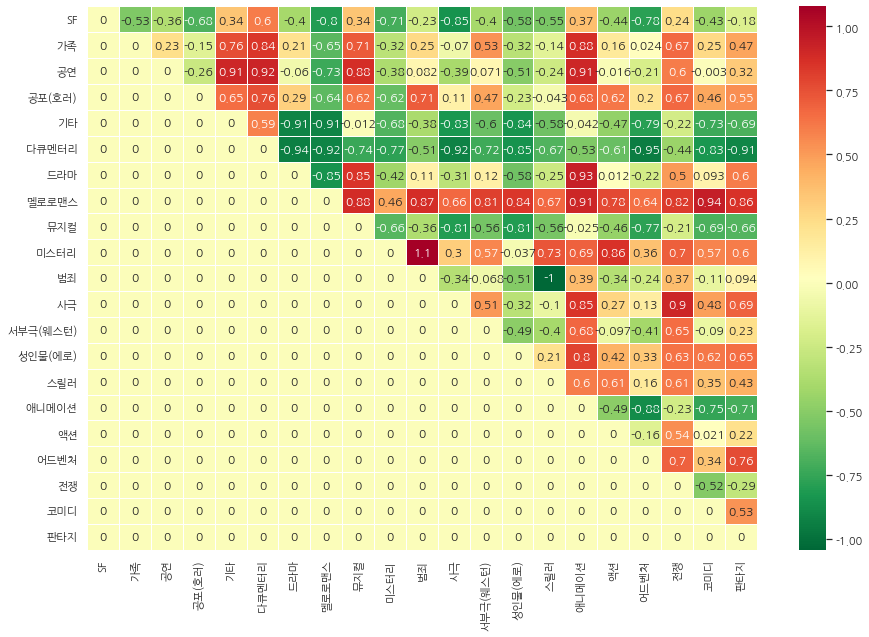

In [212]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot  as plt

np.random.seed(0)

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(15,10)) # Sample figsize in inches
ax = sns.heatmap(matrix, xticklabels=genre_names, yticklabels=genre_names, linewidths=.5, annot=True,  cmap='RdYlGn_r')
ax